<a href="https://colab.research.google.com/github/UsamaJaved78/Readme/blob/main/Ml%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(768, 9)
No of zero values in Glucose 5
No of zero values in BloodPressure 35
No of zero values in Insulin 374
No of zero values in SkinThickness 227
No of zero values in BMI 11
Negative (0): 500
Positive (1): 268


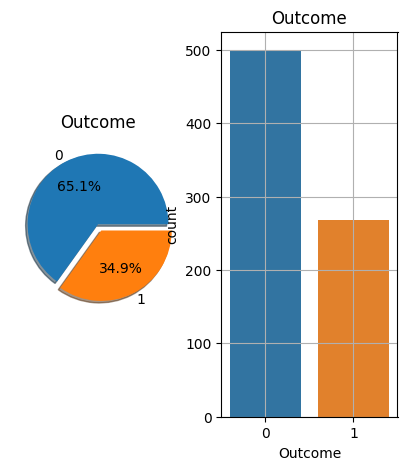

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin  \
0              6    148.0           72.0             35   79.799479   
1              1     85.0           66.0             29   79.799479   
2              8    183.0           64.0              0   79.799479   
3              1     89.0           66.0             23   94.000000   
4              0    137.0           40.0             35  168.000000   
..           ...      ...            ...            ...         ...   
763           10    101.0           76.0             48  180.000000   
764            2    122.0           70.0             27   79.799479   
765            5    121.0           72.0             23  112.000000   
766            1    126.0           60.0              0   79.799479   
767            1     93.0           70.0             31   79.799479   

           BMI  DiabetesPedigreeFunction  Age  
0    35.000000                     0.627   50  
1    29.000000                     0.351   31  
2  

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# -*- coding: utf-8 -*-
"""Final.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1_DJlVnDc1iVjzqWlT2XOF5tWNiHakwZu
"""

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

    #DATA PROCESSING

Df = pd.read_csv('/content/Diabetes dataset.csv')
Df.head() #printing the first 5 rows of the dataset
Df.shape  #number of rows and Columns in this dataset
Df.describe()   #getting the statistical measures of the data

Df.shape  #tells total number of rows and columns
print(Df.shape)
Df=Df.drop_duplicates()
Df.shape
Df.isnull().sum()  #check for null values
Df.columns

    #Checking No of Zeros in Dataset

print('No of zero values in Glucose' ,Df[Df['Glucose']==0].shape[0])
print('No of zero values in BloodPressure' ,Df[Df['BloodPressure']==0].shape[0])
print('No of zero values in Insulin' ,Df[Df['Insulin']==0].shape[0])
print('No of zero values in SkinThickness' ,Df[Df['SkinThickness']==0].shape[0])
print('No of zero values in BMI' ,Df[Df['BMI']==0].shape[0])

    #Replace them with Mean

Df['Glucose']=Df['Glucose'].replace(0,Df['Glucose'].mean())
Df['BloodPressure']=Df['BloodPressure'].replace(0,Df['BloodPressure'].mean())
Df['Insulin']=Df['Insulin'].replace(0,Df['Insulin'].mean())
Df['BMI']=Df['SkinThickness'].replace(0,Df['SkinThickness'].mean())
Df['BMI']=Df['BMI'].replace(0,Df['BMI'].mean())

Df.describe() #Statistical Measures

    #Visualization of Dataset
f, ax = plt.subplots(1, 2, figsize=(5, 5))
Df['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True, ax=ax[0])
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot(x='Outcome', data=Df, ax=ax[1])
ax[1].set_title('Outcome')
N, P = Df['Outcome'].value_counts()
print('Negative (0):', N)
print('Positive (1):', P)  # Fix: Change '0' to '1' for the positive outcome
plt.grid()
plt.show()

  #PLOT
p= Df.hist(figsize = (20,20))
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(Df.corr(), annot=True,cmap ='RdYlGn')

# separating the data and labels
X = Df.drop(columns = 'Outcome', axis=1)
Y = Df['Outcome']
print(X)
print(Y)

scaler= StandardScaler() #Data Standarization
scaler.fit(X)
X = scaler.transform(X)
print(X)

  #Train & Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
print(X.shape, X_train.shape, X_test.shape)

    #PERCEPTRON CLASSFIER FROM SCRATCH

def unit_step_func(x):
    return np.where(x > 0 , 1, 0)

class Perceptron:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.activation_func = unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.where(y > 0 , 1, 0)

        # learn weights
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.learning_rate * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)

        return y_predicted

    #MODEL EVALUATION (Training the Model Perceptron Classifier)

classP = Perceptron(learning_rate=0.001, n_iters=1000)
classP.fit(X_train, Y_train)  # training the SVM classifier with training data

# accuracy on Training Data
X_train_prediction = classP.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Perceptron Accuracy score on training data = ', training_data_accuracy)

# accuracy on Test Data
X_test_prediction = classP.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Perceptron Accuracy score on test data = ', test_data_accuracy)

    #SVM CLASSIFIER FROM SCRATCH

class SVM_classifier():

  # initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter

  # fitting the dataset to SVM Classifier
  def fit(self, X, Y):

    # m  --> number of Data points --> number of rows
    # n  --> number of input features --> number of columns
    self.m, self.n = X.shape

    # initiating the weight value and bias value
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent algorithm for Optimization

    for i in range(self.no_of_iterations):
      self.update_weights()
  # function for updating the weight and bias value
  def update_weights(self):

    # label encoding
    y_label = np.where(self.Y <= 0, -1, 1)
    # gradients ( dw, db)
    for index, x_i in enumerate(self.X):

      condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1
      if (condition == True):

        dw = 2 * self.lambda_parameter * self.w
        db = 0

      else:

        dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
        db = y_label[index]


      self.w = self.w - self.learning_rate * dw
      self.b = self.b - self.learning_rate * db

  # predict the label for a given input value
  def predict(self, X):

    output = np.dot(X, self.w) - self.b
    predicted_labels = np.sign(output)
    y_hat = np.where(predicted_labels <= -1, 0, 1)

    return y_hat

    #Training the Model (Support Vector Machine Classifier)


classifier = SVM_classifier(learning_rate=0.001, no_of_iterations=1000, lambda_parameter=0.01)
classifier.fit(X_train, Y_train)

# accuracy on Training Data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('SVM Accuracy score on training data = ', training_data_accuracy)

# accuracy on Test Data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('SVM Accuracy score on test data = ', test_data_accuracy)


    #BUILDING A PREDICTIVE SYSTEM

input_data = (5,166,72,19,175,25.8,0.587,51)

# change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

predictionS = classifier.predict(std_data)
print(predictionS)

if (predictionS[0] == 0):
  print('The SVM shows person is not diabetic')

else:
  print('The predition through SVM shows Person is diabetic')

  #Perceptron

  predictionP = classP.predict(std_data)
print(predictionP)

if (predictionP[0] == 0):
  print('The Perceptron shows person is not diabetic')

else:
  print('The prediction through Perceptron shows Person is diabetic')

